In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the uploaded CSV file to examine its contents
file_path = 'Employee.csv'
employee_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
employee_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
employee_data['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

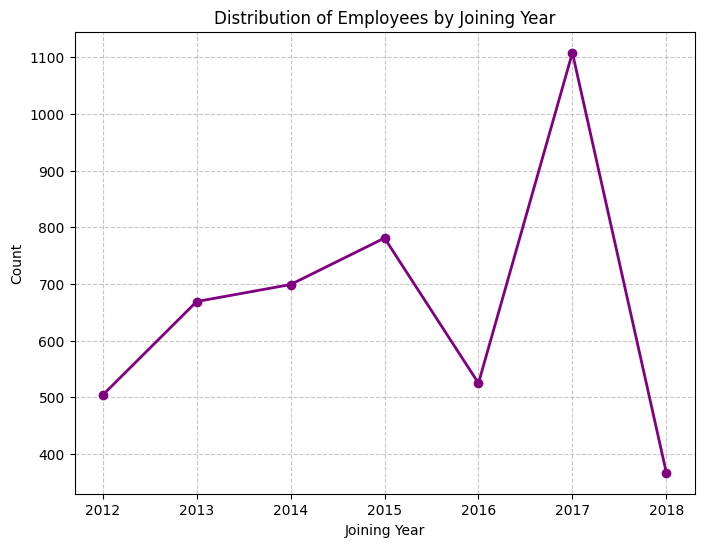

In [4]:
joining_year_counts = employee_data["JoiningYear"].value_counts().sort_index()
plt.figure(figsize=(8, 6))
joining_year_counts.plot(kind='line', marker='o', linestyle='-', linewidth=2, color='purple')
plt.title("Distribution of Employees by Joining Year")
plt.xlabel("Joining Year")
plt.ylabel("Count")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(joining_year_counts.index)
plt.show()

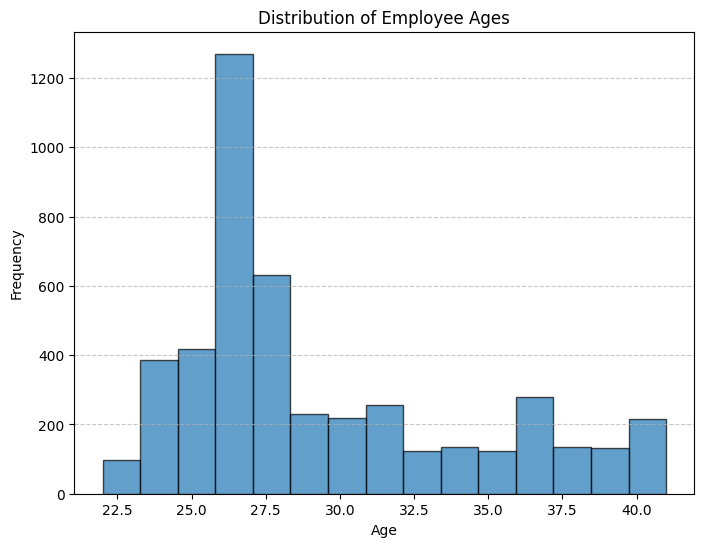

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(employee_data["Age"], bins=15, edgecolor='black', alpha=0.7)
plt.title("Distribution of Employee Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

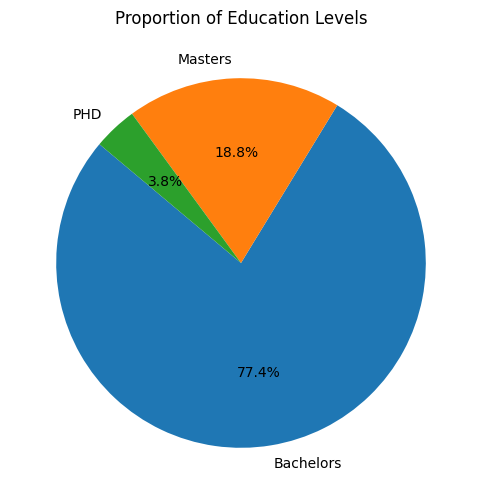

In [6]:
education_counts = employee_data["Education"].value_counts()
plt.figure(figsize=(8, 6))
education_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Education Levels")
plt.ylabel('') 
plt.show()

<Figure size 1000x600 with 0 Axes>

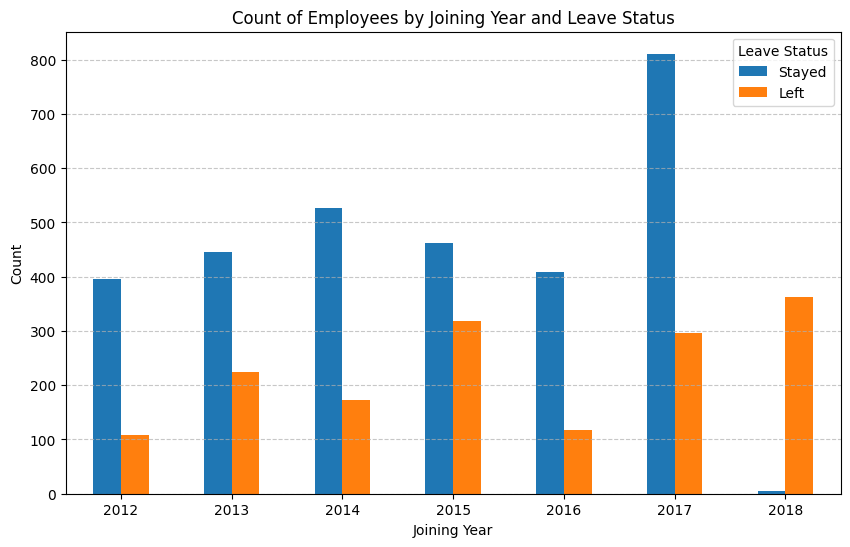

In [7]:
joining_year_leave_status = employee_data.groupby(["JoiningYear", "LeaveOrNot"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
joining_year_leave_status.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title("Count of Employees by Joining Year and Leave Status")
plt.xlabel("Joining Year")
plt.ylabel("Count")
plt.legend(["Stayed", "Left"], title="Leave Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [10]:
city_leave_proportion = employee_data.groupby("City")["LeaveOrNot"].value_counts(normalize=True).unstack() * 100
city_leave_proportion.columns = ["Stayed (%)", "Left (%)"]
city_leave_proportion.to_csv("city_leave.csv")
city_leave_proportion

,Stayed (%),Left (%)
City,,
Bangalore,73.294434,26.705566
New Delhi,68.366465,31.633535
Pune,49.605678,50.394322


In [11]:
status_education = employee_data.groupby("Education").agg({
    "LeaveOrNot": ["sum", "count"],
    "EverBenched": lambda x: sum(x == "Yes"),
})

# Renaming columns for clarity
status_education.columns = ["Left Count", "Total Count", "Ever Benched Count"]
status_education["Stayed Count"] = status_education["Total Count"] - status_education["Left Count"]
status_education["Never Benched Count"] = status_education["Total Count"] - status_education["Ever Benched Count"]

# Reordering columns
status_education = status_education[["Stayed Count", "Left Count", "Never Benched Count", "Ever Benched Count"]]
status_education.to_csv("status_education.csv")
status_education

,Stayed Count,Left Count,Never Benched Count,Ever Benched Count
Education,,,,
Bachelors,2472,1129,3208,393
Masters,447,426,791,82
PHD,134,45,176,3
